In [1]:
#import modules
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [5]:
#read csv into a dataframe
numts=pd.read_csv(r'Z:\balint\numt/3numt_array.csv')
numts=numts[numts['mt_start']<17245]
chr_mask=numts.apply(lambda row: len(row['g_id'])<3,axis=1)
#numts=numts[chr_mask].sort_values(by='mt_start')
numts=numts.sort_values(by='mt_start')

In [6]:
#define colors in a randomized way
color_part=lambda: random.randint(0,255)
color_ids=pd.Series(np.arange(1,100,1))
colors=color_ids.apply(lambda number: '#%02X%02X%02X' % (color_part(),color_part(),color_part())).tolist()

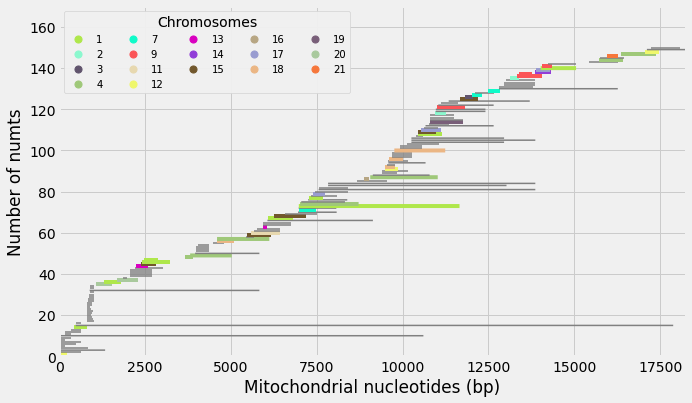

In [6]:
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,1,figsize=(10,6))
axs.set_xlim(0,18245)
axs.set_ylim(0,170)
axs.set_ylabel('Number of numts')
axs.set_xlabel('Mitochondrial nucleotides (bp)')

def numt_visualisation(row):
    global numt_count
    global used_colors
    global g_ids
    x=np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1)
    y=len(x)*[numt_count]
    try:
        color_index=int(row['g_id'])
        axs.plot(x,y,colors[color_index])
        if colors[color_index] not in used_colors:
            used_colors.append(colors[color_index])
            g_ids.append(int(row['g_id']))
    except:
        axs.plot(x,y,'grey',linewidth=1.5)
    numt_count+=1

numt_count=1
used_colors=[]
g_ids=[]
numts.apply(numt_visualisation,axis=1)
legend_colors=pd.Series(used_colors,index=g_ids)
legend_colors=legend_colors.sort_index()
custom_lines_color=legend_colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='o',
                                                        markersize=7)).tolist()
legend=axs.legend(custom_lines_color,legend_colors.index.values, loc='best', title='Chromosomes',
                  fontsize=10,ncol=5)
axs.add_artist(legend)

In [91]:
numts.apply(lambda row: np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1),axis=1)

33     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
76     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
9      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
14     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
107    [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3...
                             ...                        
150    [15954, 15955, 15956, 15957, 15958, 15959, 159...
79     [16374, 16375, 16376, 16377, 16378, 16379, 163...
22     [17061, 17062, 17063, 17064, 17065, 17066, 170...
8      [17114, 17115, 17116, 17117, 17118, 17119, 171...
13     [17228, 17229, 17230, 17231, 17232, 17233, 172...
Length: 150, dtype: object

In [30]:
#https://www.ncbi.nlm.nih.gov/genome/?term=txid9986[Organism:noexp]
sizes=pd.Series([194.85,174.33,155.69,91.39,37.99,27.5,173.68,111.8,116.25,48,87.55,155.35,143.36,163.9,
                 109.05,84.48,85.01,69.8,57.28,33.19,15.58])#Mb
sizes.index=np.arange(1,22,1)
#sizes=np.round(sizes/10,1)

In [8]:
#get subdf for every chr
dfs=pd.Series(sizes.index.values).apply(lambda g_id: numts.loc[numts['g_id']==str(g_id)])
dfs.index=sizes.index.values

In [9]:
mt_sort_numts=numts[chr_mask].sort_values(by='mt_start')

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
chr_sorted_dfs=pd.Series(np.arange(1,22,1)).apply(lambda g_id:mt_sort_numts.loc[mt_sort_numts['g_id']==str(g_id)])
chr_sorted_dfs.index=np.arange(1,22,1)

In [20]:
def get_numts(df):
    

1          score      eg2_value        e_value g_id ...
2          score     eg2_value       e_value g_id   ...
3          score     eg2_value       e_value g_id   ...
4         score      eg2_value        e_value g_id  ...
5     Empty DataFrame
Columns: [score, eg2_value, e_...
6     Empty DataFrame
Columns: [score, eg2_value, e_...
7         score     eg2_value       e_value g_id    ...
8     Empty DataFrame
Columns: [score, eg2_value, e_...
9         score      eg2_value        e_value g_id  ...
10    Empty DataFrame
Columns: [score, eg2_value, e_...
11         score     eg2_value       e_value g_id   ...
12        score      eg2_value        e_value g_id  ...
13        score     eg2_value       e_value g_id   g...
14         score     eg2_value       e_value g_id  g...
15         score     eg2_value       e_value g_id   ...
16        score     eg2_value       e_value g_id   g...
17        score      eg2_value        e_value g_id  ...
18        score      eg2_value        e_value g_

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
dtype: object

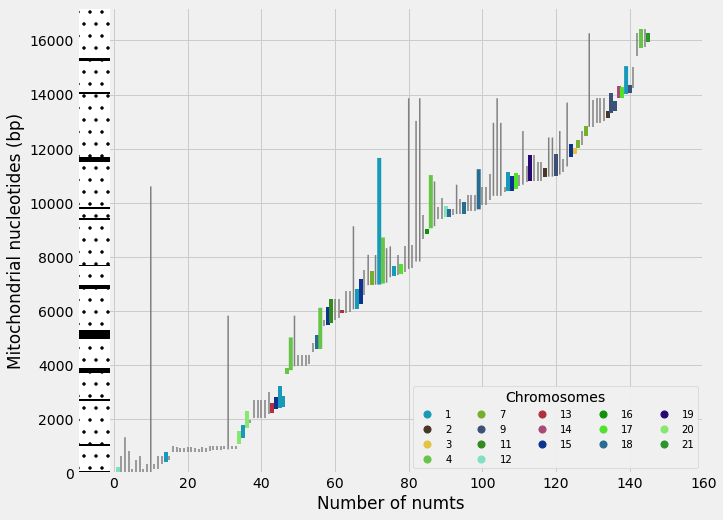

In [19]:
mitos=pd.read_csv(r'Z:\balint\numt/mitos_annotation.bed',sep='\t',header=None)
mitos.columns=['MT','START','END','DESCRIPTION','SIG','STRAND']
mitos.loc[len(mitos)]=['MT',15445,17245,'D-LOOP',0.001,'+']

trial_numts=numts[(numts['mt_start']+numts['mt_length'])<17245]

plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,1,figsize=(10,8))
axs.set_xlim(-10,160)
axs.set_ylim(0,17245)
yticklabels=list(np.arange(0,18000,2000))
yticklabels.append(17245)
axs.set_yticklabels(yticklabels)
axs.set_ylabel('Mitochondrial nucleotides (bp)')
axs.set_xlabel('Number of numts')

def numt_visualisation(row):
    global numt_count
    global used_colors
    global g_ids
    x=np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1)
    y=len(x)*[numt_count]
    try:
        color_index=int(row['g_id'])
        axs.plot(y,x,colors[color_index])
        if colors[color_index] not in used_colors:
            used_colors.append(colors[color_index])
            g_ids.append(int(row['g_id']))
    except:
        axs.plot(y,x,'grey',linewidth=1.5)
    numt_count+=1

numt_count=1
used_colors=[]
g_ids=[]
trial_numts.apply(numt_visualisation,axis=1)
legend_colors=pd.Series(used_colors,index=g_ids)
legend_colors=legend_colors.sort_index()
custom_lines_color=legend_colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='o',
                                                        markersize=7)).tolist()
legend=axs.legend(custom_lines_color,legend_colors.index.values, loc='best', title='Chromosomes',
                  fontsize=10,ncol=5)
axs.add_artist(legend)

def visualize_annotation(row):
    global summation
    y=row['END']-row['START']
    if y>100:
        axs.bar(-8,y,bottom=sum(summation),width=14,color='white',hatch='.')
    else:
        axs.bar(-8,y,bottom=sum(summation),width=14,color='black')
    summation.append(y)
    
summation=[0,]

mitos.apply(visualize_annotation,axis=1)

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


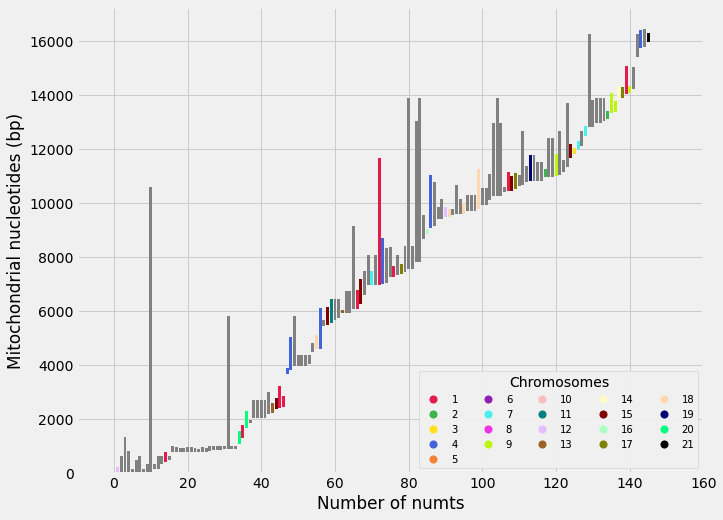

In [61]:
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(1,1,figsize=(10,8))
axs.set_xlim(-10,160)
#axs.set_ylim(0,17245)
yticklabels=list(np.arange(0,18000,2000))
yticklabels.append(17245)
yticklabels.append(18245)
axs.set_yticklabels(yticklabels)
axs.set_ylabel('Mitochondrial nucleotides (bp)')
axs.set_xlabel('Number of numts')

colors=pd.Series(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
                  '#bcf60c','#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
                  '#808000', '#ffd8b1','#000075', '#00FF7F','#000000'], index=np.arange(1,22,1))


def numt_visualisation(row):
    global numt_count
    try:
        axs.bar(numt_count,row['mt_length'],bottom=row['mt_start'],color=colors[int(row['g_id'])])
    except:
        axs.bar(numt_count,row['mt_length'],bottom=row['mt_start'],color='grey')
    numt_count+=1

numt_count=1
trial_numts.apply(numt_visualisation,axis=1)

custom_lines_color=colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='o',
                                                        markersize=7)).tolist()
legend=axs.legend(custom_lines_color,colors.index.values, loc='lower right', title='Chromosomes',
                  fontsize=10,ncol=5)
axs.add_artist(legend)

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


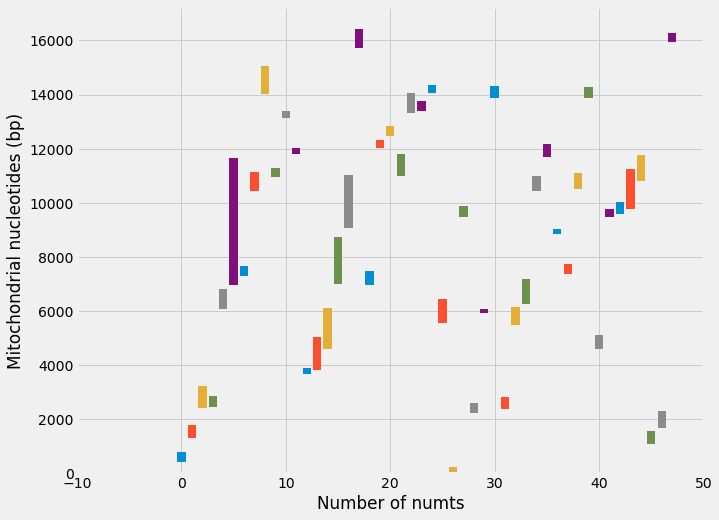

In [41]:
fig,axs=plt.subplots(1,1,figsize=(10,8))
axs.set_xlim(-10,50)
axs.set_ylim(0,17245)
yticklabels=list(np.arange(0,18000,2000))
yticklabels.append(17245)
axs.set_yticklabels(yticklabels)
axs.set_ylabel('Mitochondrial nucleotides (bp)')
axs.set_xlabel('Number of numts')

def data_prep(g_id):
    global mt_starts
    global mt_lengths
    global g_ids
    subdf=trial_numts.loc[trial_numts['g_id']==str(g_id)]
    subdf.apply(lambda row: mt_starts.append(row['mt_start']),axis=1)
    subdf.apply(lambda row: mt_lengths.append(row['mt_length']),axis=1)
    subdf.apply(lambda row: g_ids.append(row['g_id']),axis=1)

mt_starts=[]
mt_lengths=[]
g_ids=[]

pd.Series(np.arange(1,22,1)).apply(data_prep)
for index, start in enumerate(mt_starts):
    axs.bar(index,mt_lengths[index],bottom=start)